In [1]:
import pandas as pd
import numpy as np  

In [2]:
store = pd.read_csv('Data\Data_Set.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Ashwanth\AppData\Local\Temp\ipykernel_13416\3276611120.py:1: SyntaxWarning: invalid escape sequence '\D'
  store = pd.read_csv('Data\Data_Set.csv')


In [3]:
store.head()

,Date,Store ID,Product ID,Category,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount
0,01-01-2022,S001,P0001,Fresh Produce,231,127,55,135.47,33.50,20
1,01-01-2022,S001,P0002,Bakery and Confectionery,204,150,66,144.04,63.01,20
2,01-01-2022,S001,P0003,Meat and Poultry,102,65,51,74.02,27.99,10
3,01-01-2022,S001,P0004,Seafood,469,61,164,62.18,32.72,10
4,01-01-2022,S001,P0005,Snacks and Beverages,166,14,135,9.26,73.64,0


In [4]:
store['Date'] = pd.to_datetime(store['Date'], dayfirst=True)
store['Year'] = store['Date'].dt.year
store['Month'] = store['Date'].dt.month
store['Day'] = store['Date'].dt.day
store['DayOfWeek'] = store['Date'].dt.dayofweek
store['WeekOfYear'] = store['Date'].dt.isocalendar().week
store['Quarter'] = store['Date'].dt.quarter
store['IsWeekend'] = store['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [5]:
store.head()

,Date,Store ID,Product ID,Category,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Year,Month,Day,DayOfWeek,WeekOfYear,Quarter,IsWeekend
0,2022-01-01,S001,P0001,Fresh Produce,231,127,55,135.47,33.50,20,2022,1,1,5,52,1,1
1,2022-01-01,S001,P0002,Bakery and Confectionery,204,150,66,144.04,63.01,20,2022,1,1,5,52,1,1
2,2022-01-01,S001,P0003,Meat and Poultry,102,65,51,74.02,27.99,10,2022,1,1,5,52,1,1
3,2022-01-01,S001,P0004,Seafood,469,61,164,62.18,32.72,10,2022,1,1,5,52,1,1
4,2022-01-01,S001,P0005,Snacks and Beverages,166,14,135,9.26,73.64,0,2022,1,1,5,52,1,1


In [6]:
store.shape

(73396, 17)

In [7]:
store.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Inventory Level',
       'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount',
       'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter',
       'IsWeekend'],
      dtype='object')

In [8]:
store['Date'] = pd.to_datetime(store['Date'], format='%d-%m-%Y')
store = store.set_index('Date')
store.head()

,Store ID,Product ID,Category,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Year,Month,Day,DayOfWeek,WeekOfYear,Quarter,IsWeekend
Date,,,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Fresh Produce,231,127,55,135.47,33.50,20,2022,1,1,5,52,1,1
2022-01-01,S001,P0002,Bakery and Confectionery,204,150,66,144.04,63.01,20,2022,1,1,5,52,1,1
2022-01-01,S001,P0003,Meat and Poultry,102,65,51,74.02,27.99,10,2022,1,1,5,52,1,1
2022-01-01,S001,P0004,Seafood,469,61,164,62.18,32.72,10,2022,1,1,5,52,1,1
2022-01-01,S001,P0005,Snacks and Beverages,166,14,135,9.26,73.64,0,2022,1,1,5,52,1,1


In [9]:
store = store[['Store ID', 'Product ID', 'Demand Forecast', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'IsWeekend', 'Units Sold']]
store.head()

,Store ID,Product ID,Demand Forecast,Year,Month,Day,DayOfWeek,WeekOfYear,Quarter,IsWeekend,Units Sold
Date,,,,,,,,,,,
2022-01-01,S001,P0001,135.47,2022,1,1,5,52,1,1,127
2022-01-01,S001,P0002,144.04,2022,1,1,5,52,1,1,150
2022-01-01,S001,P0003,74.02,2022,1,1,5,52,1,1,65
2022-01-01,S001,P0004,62.18,2022,1,1,5,52,1,1,61
2022-01-01,S001,P0005,9.26,2022,1,1,5,52,1,1,14


In [10]:
store.shape

(73396, 11)

In [11]:
store.isnull().sum()

Store ID           0
Product ID         0
Demand Forecast    0
Year               0
Month              0
Day                0
DayOfWeek          0
WeekOfYear         0
Quarter            0
IsWeekend          0
Units Sold         0
dtype: int64

In [12]:
store.duplicated()

Date
2022-01-01    False
2022-01-01    False
2022-01-01    False
2022-01-01    False
2022-01-01    False
              ...  
2024-01-04    False
2024-01-04    False
2024-01-04    False
2024-01-04    False
2024-01-04    False
Length: 73396, dtype: bool

In [13]:
store['Store ID'] = store['Store ID'].map({'S001':1, 'S002':2, 'S003':3, 'S004':4, 'S005':5})
store['Product ID'] = store['Product ID'].map({'P0001':1, 'P0002':2, 'P0003':3, 'P0004':4, 'P0005':5, 'P0006':6, 'P0007':7, 'P0008':8, 'P0009':9, 'P0010':10, 'P0011':11, 'P0012':12, 'P0013':13, 'P0014':14, 'P0015':15, 'P0016':16, 'P0017':17, 'P0018':18, 'P0019':19, 'P0020':20})

In [14]:
store

,Store ID,Product ID,Demand Forecast,Year,Month,Day,DayOfWeek,WeekOfYear,Quarter,IsWeekend,Units Sold
Date,,,,,,,,,,,
2022-01-01,1,1,135.47,2022,1,1,5,52,1,1,127
2022-01-01,1,2,144.04,2022,1,1,5,52,1,1,150
2022-01-01,1,3,74.02,2022,1,1,5,52,1,1,65
2022-01-01,1,4,62.18,2022,1,1,5,52,1,1,61
2022-01-01,1,5,9.26,2022,1,1,5,52,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-04,5,16,10.00,2024,1,4,3,1,1,0,2
2024-01-04,5,17,10.00,2024,1,4,3,1,1,0,3
2024-01-04,5,18,10.00,2024,1,4,3,1,1,0,54


In [15]:
store1 = store['Store ID'] == 1
store2 = store['Store ID'] == 2
store3 = store['Store ID'] == 3
store4 = store['Store ID'] == 4
store5 = store['Store ID'] == 5

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(store, test_size=0.2, random_state=42, shuffle=False)
train.shape, test.shape  

((58716, 11), (14680, 11))

In [21]:
train.to_csv('Data\Train_Set.csv', index=False)
test.to_csv('Data\Test_Set.csv', index=False)
train.head()
test.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Ashwanth\AppData\Local\Temp\ipykernel_13416\554338658.py:1: SyntaxWarning: invalid escape sequence '\T'
  train.to_csv('Data\Train_Set.csv', index=False)
C:\Users\Ashwanth\AppData\Local\Temp\ipykernel_13416\554338658.py:2: SyntaxWarning: invalid escape sequence '\T'
  test.to_csv('Data\Test_Set.csv', index=False)


,Store ID,Product ID,Demand Forecast,Year,Month,Day,DayOfWeek,WeekOfYear,Quarter,IsWeekend,Units Sold
Date,,,,,,,,,,,
2023-08-11,1,17,119.36,2023,8,11,4,32,3,0,126
2023-08-11,1,18,54.86,2023,8,11,4,32,3,0,52
2023-08-11,1,19,23.86,2023,8,11,4,32,3,0,24
2023-08-11,1,20,162.46,2023,8,11,4,32,3,0,143
2023-08-11,2,1,89.47,2023,8,11,4,32,3,0,97


In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

def train_xgboost_model(train_data, target_column):
    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column]
    
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    
    return model


In [23]:
def evaluate_model(model, test_data, target_column):
    X_test = test_data.drop(columns=[target_column])
    y_test = test_data[target_column]
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

In [24]:
target_column = 'Units Sold'
model = train_xgboost_model(train, target_column)
mse, r2 = evaluate_model(model, test, target_column)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 94.72531127929688
R-squared: 0.9918947219848633


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

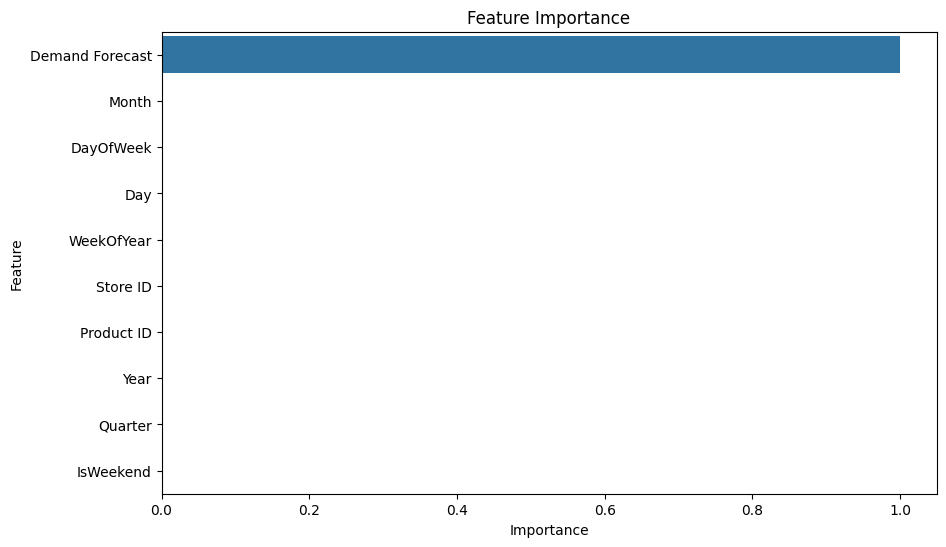

In [26]:
feature_names = train.drop(columns=[target_column]).columns
plot_feature_importance(model, feature_names)

In [27]:
def predict_future_demand(model, future_data):
    future_data = future_data.drop(columns=['Units Sold'])
    predictions = model.predict(future_data)
    return predictions

In [28]:
future_data = pd.DataFrame({
    'Store ID': [1, 2, 3, 4, 5],
    'Product ID': [1, 2, 3, 4, 5],
    'Demand Forecast': [100, 150, 200, 250, 300],
    'Year': [2023, 2023, 2023, 2023 , 2023],
    'Month': [10, 10, 10, 10, 10],
})
future_data['Day'] = [1, 1, 1, 1, 1]
future_data['DayOfWeek'] = [0, 0, 0, 0, 0]
future_data['WeekOfYear'] = [40, 40, 40, 40, 40]
future_data['Quarter'] = [4, 4, 4, 4, 4]
future_data['IsWeekend'] = [0, 0, 0, 0, 0]
future_data['Units Sold'] = 0  # Placeholder for prediction
predictions = predict_future_demand(model, future_data)
future_data['Predicted Units Sold'] = predictions
print(future_data[['Store ID', 'Product ID', 'Predicted Units Sold']])

   Store ID  Product ID  Predicted Units Sold
0         1           1             93.093491
1         2           2            145.912064
2         3           3            192.238525
3         4           4            244.457184
4         5           5            292.688080


In [ ]:
import joblib
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f'Model saved to {filename}')

In [30]:
save_model(model, 'xgboost_model.pkl')

Model saved to xgboost_model.pkl


In [31]:
loaded_model = joblib.load('xgboost_model.pkl')
print(f'Loaded model: {loaded_model}')

Loaded model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
